In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [35]:
def preprocessing(df, name):
    '''
    preprocessing data in dataframe
    '''
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.sort_values(by='created_at',ascending=False)
    df = df.set_index('created_at')
    df['field1'].fillna(df['field3'])
    df.drop(['entry_id','field2','field3', 'field4', 'field5', 'field6', 'field7', 'field8'], axis=1, inplace=True)
    df['field1'] = pd.to_numeric(df['field1'],errors='coerce')
    df = df.rename(columns={'field1':name})
    hourly_df = df.resample('H').mean().round(2)
    hourly_df.dropna(inplace=True)
    return hourly_df

In [36]:
def merge_dfs(df_list):
    '''
    Merges several dataframes into one based on the index
    '''
    from functools import reduce
    final_df = reduce(lambda left,right: pd.merge(left,right,on='created_at'), df_list)
    return final_df

In [38]:
def correlation_matrix(df):
    '''
    Generates correlation matrix
    '''
    return df.corr()

In [39]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.show()
    plt.savefig('correlation.png')

In [40]:
def compute_completeness(df):
    total_hours = 4368
    actual_hours = df.shape[0]
    return round(actual_hours/total_hours*100, 2)

In [41]:
kampala_data = pd.read_csv('./data/completeness_table_above_75_10_09_2020.csv')
kampala_data.head()

,Parish,Latitude,Longitude,Mean PM 2.5,Median PM 2.5,25th Percentile,75th Percentile,No. of hourly measurements,6-Month Completeness (%)
0,Nakasero II(2),0.322320,32.575700,37.7,35.9,19.7,48.4,4349,99.57
1,Kansanga,0.298750,32.615000,32.7,30.6,15.6,43.8,4311,98.70
2,Nansana East,0.375900,32.528000,62.4,51.7,36.0,79.8,4093,93.70
3,Lubaga,0.295314,32.553682,52.1,45.6,32.1,63.8,4055,92.83
4,Nansana West,0.363000,32.529000,57.7,48.6,36.7,70.3,4053,92.79


In [42]:
import os
kampala_df_list = []
for parish in kampala_data.Parish:
    for f in os.listdir('data/'):
        if parish+'.csv' in f:
            filepath = 'data/'+f
    print(filepath)
    location_df = pd.read_csv(filepath)
    preprocessed_df = preprocessing(location_df, parish.lower().replace(' ', '_'))
    kampala_df_list.append(preprocessed_df)
    print('DONE!!!')

data/AQ_66-Nakasero II(2).csv


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DONE!!!
data/aq_46-Kansanga.csv
DONE!!!
data/aq_58-Nansana East.csv
DONE!!!
data/aq_39-Lubaga.csv
DONE!!!
data/aq_63-Nansana West.csv
DONE!!!
data/AQ_49-Lukuli(2).csv
DONE!!!
data/aq_29-Bugolobi.csv
DONE!!!
data/aq_59-Kyaliwajjala.csv
DONE!!!
data/AQ_32-Seguku.csv
DONE!!!
data/AQ_30-Kiwafu.csv
DONE!!!
data/aq_61-Kiwatule.csv
DONE!!!
data/aq_26-Civic Centre.csv
DONE!!!
data/aq_43-Makindye I.csv
DONE!!!


In [43]:
kampala_df_list[5].head()

,lukuli(2)
created_at,
2020-02-14 00:00:00+00:00,47.23
2020-02-14 01:00:00+00:00,37.67
2020-02-14 02:00:00+00:00,31.02
2020-02-14 03:00:00+00:00,31.71
2020-02-14 04:00:00+00:00,35.25


In [44]:
kampala_merged_df = merge_dfs(kampala_df_list)
kampala_merged_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
created_at,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,49.48,54.06,91.20,48.35,81.45,47.23,60.42,71.84,54.90,67.69,52.25,44.12,50.98
2020-02-14 01:00:00+00:00,41.36,41.99,88.50,47.21,71.80,37.67,44.94,50.60,44.96,62.32,40.87,37.35,43.32
2020-02-14 02:00:00+00:00,38.66,34.01,79.04,55.33,85.97,31.02,38.04,44.08,50.87,55.89,33.82,37.13,57.33
2020-02-14 03:00:00+00:00,36.88,37.33,85.47,104.50,242.98,31.71,36.69,49.85,55.17,54.80,38.37,38.78,43.54
2020-02-14 04:00:00+00:00,34.72,37.95,252.73,88.82,103.63,35.25,32.70,54.73,47.46,56.34,82.25,43.27,39.89


In [45]:
compute_completeness(kampala_merged_df)

63.03

In [46]:
kampala_merged_df.shape

(2753, 13)

In [51]:
kampala_corr_df = correlation_matrix(kampala_merged_df)
kampala_corr_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000000,0.821899,0.681572,0.547885,0.259706,0.824186,0.852343,0.629853,0.659910,0.596855,0.655871,0.838203,0.771884
kansanga,0.821899,1.000000,0.616587,0.522944,0.119071,0.854969,0.917576,0.639331,0.609321,0.650791,0.728728,0.778860,0.743724
nansana_east,0.681572,0.616587,1.000000,0.472056,0.406686,0.724718,0.684340,0.578543,0.540648,0.499251,0.501460,0.709195,0.707430
lubaga,0.547885,0.522944,0.472056,1.000000,0.257366,0.520741,0.509420,0.431614,0.493909,0.462024,0.488352,0.548809,0.491775
nansana_west,0.259706,0.119071,0.406686,0.257366,1.000000,0.265689,0.192256,0.232985,0.275080,0.088281,0.041872,0.336738,0.408057
lukuli(2),0.824186,0.854969,0.724718,0.520741,0.265689,1.000000,0.890933,0.657541,0.626294,0.632888,0.639534,0.842341,0.895827
bugolobi,0.852343,0.917576,0.684340,0.509420,0.192256,0.890933,1.000000,0.672982,0.622736,0.630869,0.696200,0.857416,0.796362
kyaliwajjala,0.629853,0.639331,0.578543,0.431614,0.232985,0.657541,0.672982,1.000000,0.496235,0.469297,0.531447,0.625229,0.615807
seguku,0.659910,0.609321,0.540648,0.493909,0.275080,0.626294,0.622736,0.496235,1.000000,0.549256,0.522228,0.643191,0.587060
kiwafu,0.596855,0.650791,0.499251,0.462024,0.088281,0.632888,0.630869,0.469297,0.549256,1.000000,0.548185,0.567643,0.534975


In [54]:
rounded_df =kampala_corr_df.round(decimals=3)
rounded_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000,0.822,0.682,0.548,0.260,0.824,0.852,0.630,0.660,0.597,0.656,0.838,0.772
kansanga,0.822,1.000,0.617,0.523,0.119,0.855,0.918,0.639,0.609,0.651,0.729,0.779,0.744
nansana_east,0.682,0.617,1.000,0.472,0.407,0.725,0.684,0.579,0.541,0.499,0.501,0.709,0.707
lubaga,0.548,0.523,0.472,1.000,0.257,0.521,0.509,0.432,0.494,0.462,0.488,0.549,0.492
nansana_west,0.260,0.119,0.407,0.257,1.000,0.266,0.192,0.233,0.275,0.088,0.042,0.337,0.408
lukuli(2),0.824,0.855,0.725,0.521,0.266,1.000,0.891,0.658,0.626,0.633,0.640,0.842,0.896
bugolobi,0.852,0.918,0.684,0.509,0.192,0.891,1.000,0.673,0.623,0.631,0.696,0.857,0.796
kyaliwajjala,0.630,0.639,0.579,0.432,0.233,0.658,0.673,1.000,0.496,0.469,0.531,0.625,0.616
seguku,0.660,0.609,0.541,0.494,0.275,0.626,0.623,0.496,1.000,0.549,0.522,0.643,0.587
kiwafu,0.597,0.651,0.499,0.462,0.088,0.633,0.631,0.469,0.549,1.000,0.548,0.568,0.535


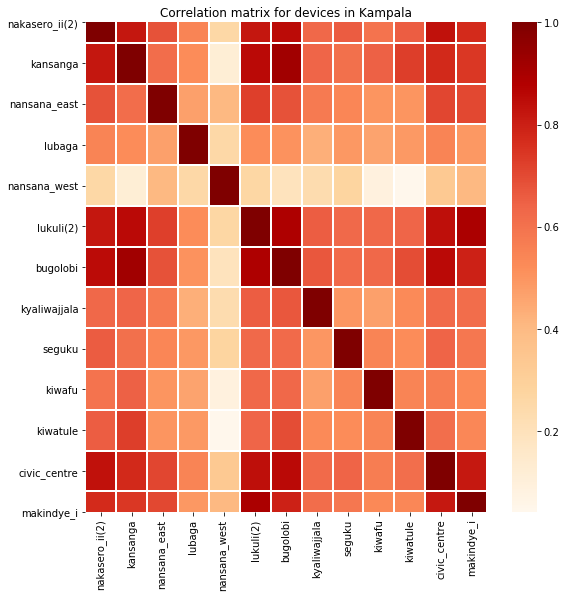

<Figure size 432x288 with 0 Axes>

In [55]:
heat_map(rounded_df, 'Correlation matrix for devices in Kampala')